In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Supress the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the Dataset

adv = pd.read_csv("advertising.csv")

In [3]:
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
adv.shape

(200, 4)

In [5]:
adv.info()
##no null values present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
adv.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


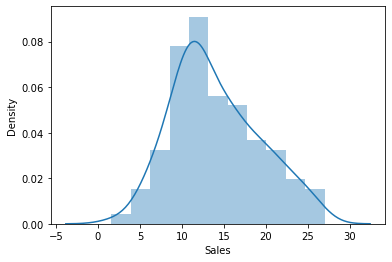

In [7]:
#create some plots to check the data
sns.distplot(adv['Sales']);

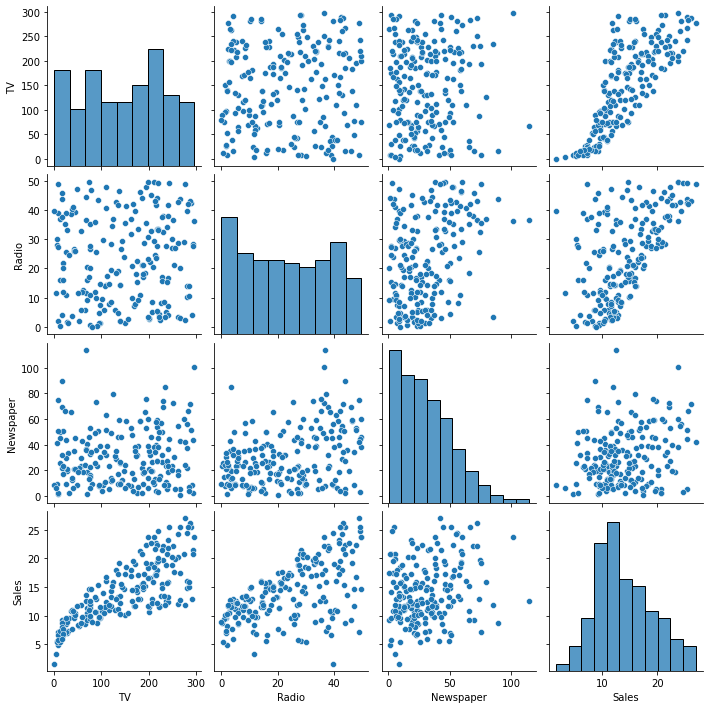

In [8]:
sns.pairplot(adv);

In [9]:
##IQR method of detecting outliers

def iqr_func(data):
    Q1 = np.percentile(data, 25, interpolation = 'midpoint') 
    Q3 = np.percentile(data, 75, interpolation = 'midpoint')
    IQR=Q3-Q1
    lo=Q1-1.5*IQR
    uo=Q3+1.5*IQR
    outlier=[]
    for x in data:
        if ((x> uo) or (x<lo)):
            outlier.append(x)
            
    print('outlier in the dataset are:', outlier )
    
iqr_func(adv['Newspaper'])
iqr_func(adv['TV'])
iqr_func(adv['Radio'])
#there are 2 outlier values in the dataset

outlier in the dataset are: [114.0, 100.9]
outlier in the dataset are: []
outlier in the dataset are: []


In [10]:
adv['Newspaper'].sort_values(ascending=False).head(2)

16     114.0
101    100.9
Name: Newspaper, dtype: float64

In [11]:
#adv['Newspaper'].iloc[16]
adv = adv.drop(labels=[16,101], axis=0)

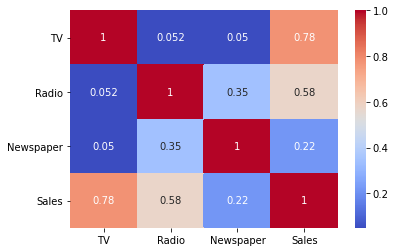

In [12]:
###correlation
sns.heatmap(adv.corr(), cmap = "coolwarm", annot = True)
plt.show()

In [13]:
#Training a linear regresssion model
## defining the independent and dependent variables in the dataset.
#X=adv[['TV','Radio','Newspaper']]
feature_cols = ['TV', 'Radio', 'Newspaper']     #multiple independent variables
X = adv[feature_cols]
y=adv['Sales']


In [14]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 5)

In [15]:
X_train.head()

,TV,Radio,Newspaper
188,286.0,13.9,3.7
182,56.2,5.7,29.7
60,53.5,2.0,21.4
185,205.0,45.1,19.6
12,23.8,35.1,65.9


In [16]:
##creating and traing the model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [17]:
##Model evaluation
print(lm.intercept_) 
print(lm.coef_)    #slope

3.114207755852531
[ 0.04559686  0.18629369 -0.00225408]


In [18]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.045597
Radio,0.186294
Newspaper,-0.002254


In [19]:
# Interpreting the coefficients:

# Holding all other features fixed, a 1 unit increase in TV is associated with an *increase of $4.6 *.
# Holding all other features fixed, a 1 unit increase in Radio is associated with an *increase of $19 *.
# Holding all other features fixed, a 1 unit increase of newspaper is associated with an *decrease of $0.4 *.

In [20]:
#Predictions from our model
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

In [21]:
#Visualize the regression line - best fit line (working purely on the train data only!)
#plt.scatter(X_train, y_train)
# plt.plot(y_train,y_train_pred,color='r')
# plt.show()
#plt.scatter(y_train, y_train_pred)      


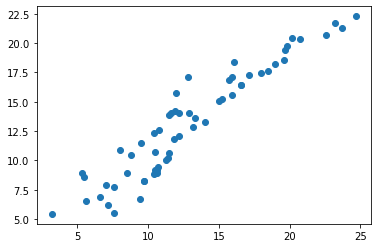

In [22]:
plt.scatter(y_test,y_test_pred)

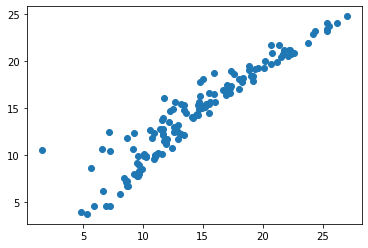

In [23]:
plt.scatter(y_train, y_train_pred)

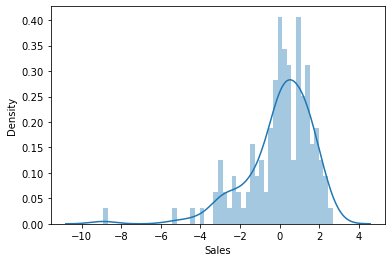

In [24]:
#Residual histogram
sns.distplot((y_train-y_train_pred),bins=50);

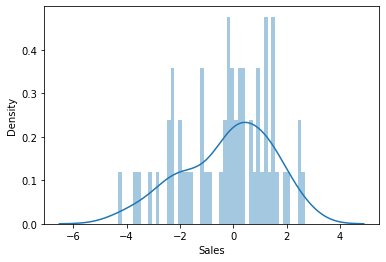

In [25]:
sns.distplot((y_test-y_test_pred),bins=50);

In [26]:
#Adj(R2)=1-(1-R2)(n-1/n-k-1)
n=len(X)
k=len(feature_cols)

In [27]:
##Regression evaluation metrics
from sklearn import metrics
r2_train=metrics.r2_score(y_train, y_train_pred)  
print('R^2_train:', metrics.r2_score(y_train, y_train_pred))
print('Adj(R2_train):', (1-((1-r2_train)*(n-1)/(n-k-1))))
print('MAE_train:', metrics.mean_absolute_error(y_train, y_train_pred))
print('MSE_train:', metrics.mean_squared_error(y_train, y_train_pred))
print('RMSE_train:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

R^2_train: 0.895935137523506
Adj(R2_train): 0.8943258870728386
MAE_train: 1.219985201397919
MSE_train: 2.8341763111746254
RMSE_train: 1.683501206169638


In [28]:
r2_test=metrics.r2_score(y_test, y_test_pred)
print('R^2_test:', metrics.r2_score(y_test, y_test_pred))
print('Adj(R2_test):', (1-((1-r2_test)*(n-1)/(n-k-1))))
print('MAE_test:', metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE_test:', metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE_test:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2_test: 0.8875354306856444
Adj(R2_test): 0.8857962878611957
MAE_test: 1.316952124890343
MSE_test: 2.775531537802285
RMSE_test: 1.6659926583878708
